In [1]:
import pandas
pandas.__version__

'0.23.4'

CSV is based on 
https://www.bowl.com/Open_Championships/Open_Championships_Home/Past_Results_and_History/

Load the file into Pandas

In [3]:
dframe = pandas.read_csv("bowling_stats.csv")
dframe.head()

2018    Syracuse    N.Y.     7    556
0  2017   Las Vegas    Nev.  10.0  286.0
1  2016        Reno    Nev.   8.0   63.0
2  2015     El Paso   Texas   7.0  315.0
3  2014        Reno    Nev.   9.0   24.0
4  2013        Reno    Nev.  10.0  253.0

Because Pandas assumes the first row is a header, we need to specify that there is no header

In [4]:
dframe = pandas.read_csv("bowling_stats.csv",header=None)
dframe.head()

0           1       2     3      4
0  2018    Syracuse    N.Y.   7.0  556.0
1  2017   Las Vegas    Nev.  10.0  286.0
2  2016        Reno    Nev.   8.0   63.0
3  2015     El Paso   Texas   7.0  315.0
4  2014        Reno    Nev.   9.0   24.0

As a check, look at the CSV content

In [4]:
!head bowling_stats.csv

2018, Syracuse, N.Y., 7,556
2017, Las Vegas, Nev., 10,286
2016, Reno, Nev., 8,063
2015, El Paso, Texas, 7,315
2014, Reno, Nev., 9,024
2013, Reno, Nev., 10,253
2012, Baton Rouge, La., 11,794
2011, Reno, Nev.,   12,837
2010, Reno, Nev., 14,189
2009, Las Vegas, Nev., 17,200


_Problem_: last column contains comma and is not wrapped in double quotes.

Label the columns to make manipulation easier to understand.

In [5]:
dframe.columns=['year','city','state','count1','count2']
dframe.head()

year        city   state  count1  count2
0  2018    Syracuse    N.Y.     7.0   556.0
1  2017   Las Vegas    Nev.    10.0   286.0
2  2016        Reno    Nev.     8.0    63.0
3  2015     El Paso   Texas     7.0   315.0
4  2014        Reno    Nev.     9.0    24.0

Alternatively, we could have labeled the columns at load time using the following:

In [6]:
dframe = pandas.read_csv("bowling_stats.csv",
                            header=None,
                            names=['year','city','state','count1','count2'])

dframe.head()

year        city   state  count1  count2
0  2018    Syracuse    N.Y.     7.0   556.0
1  2017   Las Vegas    Nev.    10.0   286.0
2  2016        Reno    Nev.     8.0    63.0
3  2015     El Paso   Texas     7.0   315.0
4  2014        Reno    Nev.     9.0    24.0

Since the comma is used as delimiter, we'll need to recombine the two columns.

What about the early counts?

In [7]:
dframe.tail()

year           city  state  count1  count2
111  1905      Milwaukee   Wis.   217.0     NaN
112  1904      Cleveland   Ohio   112.0     NaN
113  1903   Indianapolis   Ind.    78.0     NaN
114  1902        Buffalo   N.Y.    61.0     NaN
115  1901        Chicago   Ill.    41.0     NaN

The combination of the two columns will be tricky since occasionally there is NaN

In [8]:
dframe.dtypes

year       object
city       object
state      object
count1    float64
count2    float64
dtype: object

combine columns 4 and 5: col_4 = col_4 * 1000 + col_5

In [9]:
dframe['count1']*1000 + dframe['count2']

0       7556.0
1      10286.0
2       8063.0
3       7315.0
4       9024.0
5      10253.0
6      11794.0
7      12837.0
8      14189.0
9      17200.0
10     12615.0
11     16235.0
12     12606.0
13     13222.0
14     16585.0
15     12203.0
16     10806.0
17     16104.0
18     10688.0
19      9912.0
20     15925.0
21      9480.0
22      9764.0
23     17285.0
24      9285.0
25      8518.0
26      8557.0
27      8359.0
28      9199.0
29      7717.0
        ...   
86      2443.0
87      2523.0
88      2251.0
89      1452.0
90      1876.0
91      2200.0
92      2132.0
93      1956.0
94      1126.0
95         NaN
96         NaN
97         NaN
98         NaN
99         NaN
100        NaN
101        NaN
102        NaN
103        NaN
104        NaN
105        NaN
106        NaN
107        NaN
108        NaN
109        NaN
110        NaN
111        NaN
112        NaN
113        NaN
114        NaN
115        NaN
Length: 116, dtype: float64

What to do: If 5th column is not NaN, <BR>
    combine columns 4 and 5: col_4 = col_4 * 1000 + col_5

In [10]:
def merge_columns(row):
    if pandas.isna(row['count2']):
        return row['count1']
    else:
        return row['count1']*1000+row['count2']

Apply the function to each row

In [11]:
dframe['total']=dframe.apply(merge_columns,axis=1)

In [12]:
dframe.head()

year        city   state  count1  count2    total
0  2018    Syracuse    N.Y.     7.0   556.0   7556.0
1  2017   Las Vegas    Nev.    10.0   286.0  10286.0
2  2016        Reno    Nev.     8.0    63.0   8063.0
3  2015     El Paso   Texas     7.0   315.0   7315.0
4  2014        Reno    Nev.     9.0    24.0   9024.0

In [13]:
dframe.tail()

year           city  state  count1  count2  total
111  1905      Milwaukee   Wis.   217.0     NaN  217.0
112  1904      Cleveland   Ohio   112.0     NaN  112.0
113  1903   Indianapolis   Ind.    78.0     NaN   78.0
114  1902        Buffalo   N.Y.    61.0     NaN   61.0
115  1901        Chicago   Ill.    41.0     NaN   41.0

Plot the total versus the year

In [14]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'2.2.3'

In [15]:
dframe

year             city   state  count1  count2    total
0    2018         Syracuse    N.Y.     7.0   556.0   7556.0
1    2017        Las Vegas    Nev.    10.0   286.0  10286.0
2    2016             Reno    Nev.     8.0    63.0   8063.0
3    2015          El Paso   Texas     7.0   315.0   7315.0
4    2014             Reno    Nev.     9.0    24.0   9024.0
5    2013             Reno    Nev.    10.0   253.0  10253.0
6    2012      Baton Rouge     La.    11.0   794.0  11794.0
7    2011             Reno    Nev.    12.0   837.0  12837.0
8    2010             Reno    Nev.    14.0   189.0  14189.0
9    2009        Las Vegas    Nev.    17.0   200.0  17200.0
10   2008      Albuquerque    N.M.    12.0   615.0  12615.0
11   2007             Reno    Nev.    16.0   235.0  16235.0
12   2006   Corpus Christi   Texas    12.0   606.0  12606.0
13   2005      Baton Rouge     La.    13.0   222.0  13222.0
14   2004             Reno    Nev.    16.0   585.0  16585.0
15   2003        Knoxville   Tenn.    12.0   203.0  12203.0
16   2002         Billings   Mont.    10.0   806.0  10806.0
17   2001             Reno    Nev.    16.0   104.0  16104.0
18   2000      Albuquerque    N.M.    10.0   688.0  10688.0
19   1999         Syracuse    N.Y.     9.0   912.0   9912.0
20   1998             Reno    Nev.    15.0   925.0  15925.0
21   1997       Huntsville    Ala.     9.0   480.0   9480.0
22   1996   Salt Lake City    Utah     9.0   764.0   9764.0
23   1995             Reno    Nev.    17.0   285.0  17285.0
24   1994           Mobile    Ala.     9.0   285.0   9285.0
25   1993            Tulsa   Okla.     8.0   518.0   8518.0
26   1992   Corpus Christi   Texas     8.0   557.0   8557.0
27   1991           Toledo    Ohio     8.0   359.0   8359.0
28   1990             Reno    Nev.     9.0   199.0   9199.0
29   1989          Wichita    Kan.     7.0   717.0   7717.0
..    ...              ...     ...     ...     ...      ...
86   1930        Cleveland    Ohio     2.0   443.0   2443.0
87   1929          Chicago    Ill.     2.0   523.0   2523.0
88   1928      Kansas City     Mo.     2.0   251.0   2251.0
89   1927           Peoria    Ill.     1.0   452.0   1452.0
90   1926           Toledo    Ohio     1.0   876.0   1876.0
91   1925          Buffalo    N.Y.     2.0   200.0   2200.0
92   1924          Chicago    Ill.     2.0   132.0   2132.0
93   1923        Milwaukee    Wis.     1.0   956.0   1956.0
94   1922           Toledo    Ohio     1.0   126.0   1126.0
95   1921          Buffalo    N.Y.   940.0     NaN    940.0
96   1920           Peoria    Ill.   900.0     NaN    900.0
97   1919           Toledo    Ohio   796.0     NaN    796.0
98   1918       Cincinnati    Ohio   654.0     NaN    654.0
99   1917     Grand Rapids   Mich.   714.0     NaN    714.0
100  1916           Toledo    Ohio   756.0     NaN    756.0
101  1915           Peoria    Ill.   513.0     NaN    513.0
102  1914          Buffalo    N.Y.   450.0     NaN    450.0
103  1913           Toledo    Ohio   502.0     NaN    502.0
104  1912          Chicago    Ill.   596.0     NaN    596.0
105  1911        St. Louis     Mo.   414.0     NaN    414.0
106  1910          Detroit   Mich.   401.0     NaN    401.0
107  1909       Pittsburgh     Pa.   374.0     NaN    374.0
108  1908       Cincinnati    Ohio   362.0     NaN    362.0
109  1907        St. Louis     Mo.   224.0     NaN    224.0
110  1906       Louisville     Ky.   221.0     NaN    221.0
111  1905        Milwaukee    Wis.   217.0     NaN    217.0
112  1904        Cleveland    Ohio   112.0     NaN    112.0
113  1903     Indianapolis    Ind.    78.0     NaN     78.0
114  1902          Buffalo    N.Y.    61.0     NaN     61.0
115  1901          Chicago    Ill.    41.0     NaN     41.0

[116 rows x 6 columns]

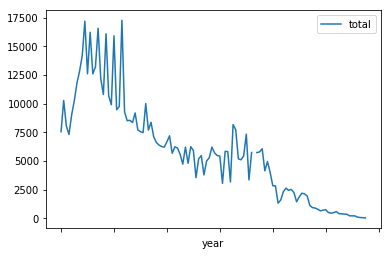

In [16]:
dframe.plot(x='year',y='total')

In [17]:
dframe

year             city   state  count1  count2    total
0    2018         Syracuse    N.Y.     7.0   556.0   7556.0
1    2017        Las Vegas    Nev.    10.0   286.0  10286.0
2    2016             Reno    Nev.     8.0    63.0   8063.0
3    2015          El Paso   Texas     7.0   315.0   7315.0
4    2014             Reno    Nev.     9.0    24.0   9024.0
5    2013             Reno    Nev.    10.0   253.0  10253.0
6    2012      Baton Rouge     La.    11.0   794.0  11794.0
7    2011             Reno    Nev.    12.0   837.0  12837.0
8    2010             Reno    Nev.    14.0   189.0  14189.0
9    2009        Las Vegas    Nev.    17.0   200.0  17200.0
10   2008      Albuquerque    N.M.    12.0   615.0  12615.0
11   2007             Reno    Nev.    16.0   235.0  16235.0
12   2006   Corpus Christi   Texas    12.0   606.0  12606.0
13   2005      Baton Rouge     La.    13.0   222.0  13222.0
14   2004             Reno    Nev.    16.0   585.0  16585.0
15   2003        Knoxville   Tenn.    12.0   203.0  12203.0
16   2002         Billings   Mont.    10.0   806.0  10806.0
17   2001             Reno    Nev.    16.0   104.0  16104.0
18   2000      Albuquerque    N.M.    10.0   688.0  10688.0
19   1999         Syracuse    N.Y.     9.0   912.0   9912.0
20   1998             Reno    Nev.    15.0   925.0  15925.0
21   1997       Huntsville    Ala.     9.0   480.0   9480.0
22   1996   Salt Lake City    Utah     9.0   764.0   9764.0
23   1995             Reno    Nev.    17.0   285.0  17285.0
24   1994           Mobile    Ala.     9.0   285.0   9285.0
25   1993            Tulsa   Okla.     8.0   518.0   8518.0
26   1992   Corpus Christi   Texas     8.0   557.0   8557.0
27   1991           Toledo    Ohio     8.0   359.0   8359.0
28   1990             Reno    Nev.     9.0   199.0   9199.0
29   1989          Wichita    Kan.     7.0   717.0   7717.0
..    ...              ...     ...     ...     ...      ...
86   1930        Cleveland    Ohio     2.0   443.0   2443.0
87   1929          Chicago    Ill.     2.0   523.0   2523.0
88   1928      Kansas City     Mo.     2.0   251.0   2251.0
89   1927           Peoria    Ill.     1.0   452.0   1452.0
90   1926           Toledo    Ohio     1.0   876.0   1876.0
91   1925          Buffalo    N.Y.     2.0   200.0   2200.0
92   1924          Chicago    Ill.     2.0   132.0   2132.0
93   1923        Milwaukee    Wis.     1.0   956.0   1956.0
94   1922           Toledo    Ohio     1.0   126.0   1126.0
95   1921          Buffalo    N.Y.   940.0     NaN    940.0
96   1920           Peoria    Ill.   900.0     NaN    900.0
97   1919           Toledo    Ohio   796.0     NaN    796.0
98   1918       Cincinnati    Ohio   654.0     NaN    654.0
99   1917     Grand Rapids   Mich.   714.0     NaN    714.0
100  1916           Toledo    Ohio   756.0     NaN    756.0
101  1915           Peoria    Ill.   513.0     NaN    513.0
102  1914          Buffalo    N.Y.   450.0     NaN    450.0
103  1913           Toledo    Ohio   502.0     NaN    502.0
104  1912          Chicago    Ill.   596.0     NaN    596.0
105  1911        St. Louis     Mo.   414.0     NaN    414.0
106  1910          Detroit   Mich.   401.0     NaN    401.0
107  1909       Pittsburgh     Pa.   374.0     NaN    374.0
108  1908       Cincinnati    Ohio   362.0     NaN    362.0
109  1907        St. Louis     Mo.   224.0     NaN    224.0
110  1906       Louisville     Ky.   221.0     NaN    221.0
111  1905        Milwaukee    Wis.   217.0     NaN    217.0
112  1904        Cleveland    Ohio   112.0     NaN    112.0
113  1903     Indianapolis    Ind.    78.0     NaN     78.0
114  1902          Buffalo    N.Y.    61.0     NaN     61.0
115  1901          Chicago    Ill.    41.0     NaN     41.0

[116 rows x 6 columns]

In [18]:
dframe.dtypes

year       object
city       object
state      object
count1    float64
count2    float64
total     float64
dtype: object

Maybe the x-axis labels broke because the 'year' wasn't numeric.

Let's force the year to be numeric:

In [19]:
dframe['year']=pandas.to_numeric(dframe['year'])

ValueError: Unable to parse string "1943-45" at position 73

In [ ]:
pandas.set_option('max_rows', 500)

In [ ]:
dframe

<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>


One solution would be to manually clean up the CSV.

Alternatively, we can drop that row and see if that solves the problem.

In [ ]:
dframe=dframe.drop(73)

In [ ]:
dframe['year']=pandas.to_numeric(dframe['year'])

No errors reported, so let's look at the plot

In [ ]:
dframe.plot(x='year',y='total',style='o')
plt.tick_params(labelsize=14)
plt.xlabel('year',fontsize=14)
plt.ylabel('attendance',fontsize=14)
plt.show()

Just to confirm, let's check the data type of each column

In [ ]:
dframe.dtypes